In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
from sklearn.preprocessing import StandardScaler
scalar_ = StandardScaler()

In [7]:
df['trestbps'] = scalar_.fit_transform(df[['trestbps']])

In [9]:
df['chol'] = scalar_.fit_transform(df[['chol']])

In [10]:
df['thalach'] = scalar_.fit_transform(df[['thalach']])

In [11]:
df['age'] = scalar_.fit_transform(df[['age']])

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,2.3,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,3.5,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,1.4,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,0.8,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,0.2,1,0,3,0
299,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,1.2,1,0,3,0
300,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,3.4,1,2,3,0
301,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,1.2,1,1,3,0


In [13]:
y = df['target'].values

In [14]:
x = df.drop(columns='target').values

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2,random_state=0, stratify = y)

LOGISTIC REGRESSION

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression()

In [19]:
lr.fit(x_train,y_train)

LogisticRegression()

In [20]:
pred_y = lr.predict(x_test)

In [21]:
pred_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [22]:
import seaborn as sns
from sklearn.metrics import roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics

Evaluating Logistic Regression 


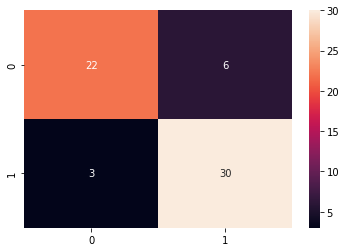

In [25]:
print('Evaluating Logistic Regression ')
CM=confusion_matrix(y_test,pred_y)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, pred_y)
roc=roc_auc_score(y_test, pred_y)
prec = precision_score(y_test, pred_y)
rec = recall_score(y_test, pred_y)
f1 = f1_score(y_test, pred_y)

model_results =pd.DataFrame([['Logistic Regression',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])


In [26]:
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Logistic Regression,0.852459,0.833333,0.909091,0.785714,0.869565,0.847403


In [27]:
score = lr.score(x_test, y_test)

In [28]:
score

0.8524590163934426

**KNN**

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
classifier = KNeighborsClassifier(n_neighbors=91, metric='euclidean')

In [31]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=91)

In [32]:
pred_y2=classifier.predict(x_test)

In [33]:
pred_y2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0])

Evaluating KNN 


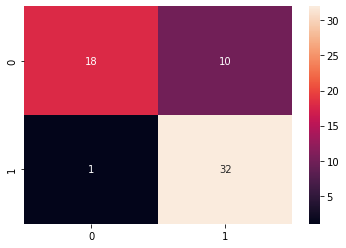

In [34]:
print('Evaluating KNN ')
CM=confusion_matrix(y_test,pred_y2)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, pred_y2)
roc=roc_auc_score(y_test, pred_y2)
prec = precision_score(y_test, pred_y2)
rec = recall_score(y_test, pred_y2)
f1 = f1_score(y_test, pred_y2)

model_results =pd.DataFrame([['K Near Neighbour',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])


In [35]:
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,K Near Neighbour,0.819672,0.761905,0.969697,0.642857,0.853333,0.806277


In [36]:
score2=classifier.score(x_test,y_test)

In [37]:
score2

0.819672131147541

Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(random_state=1)

In [40]:
rf.fit(x_train,y_train)
pred_y3 = rf.predict(x_test)

In [41]:
pred_y3

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0])

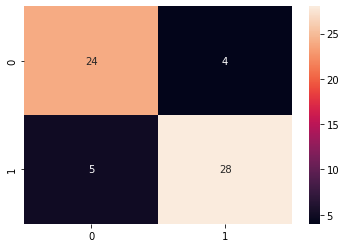

In [42]:
CM=confusion_matrix(y_test,pred_y3)
sns.heatmap(CM, annot=True)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]
specificity = TN/(TN+FP)
acc= accuracy_score(y_test, pred_y3)
roc=roc_auc_score(y_test, pred_y3)
prec = precision_score(y_test, pred_y3)
rec = recall_score(y_test, pred_y3)
f1 = f1_score(y_test, pred_y3)

model_results =pd.DataFrame([['Random Forest',acc, prec,rec,specificity, f1,roc]], columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])


In [43]:
model_results

,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Random Forest,0.852459,0.875,0.848485,0.857143,0.861538,0.852814


In [44]:
score_3 = rf.score(x_test,y_test)

In [45]:
score_3

0.8524590163934426

In [46]:
data = {        'LR': pred_y,        
                'KNN': pred_y2, 
                'RF': pred_y3
       }
models = pd.DataFrame(data)

for column in models:
    CM=confusion_matrix(y_test,models[column])
    
    TN = CM[0][0]
    FN = CM[1][0]
    TP = CM[1][1]
    FP = CM[0][1]
    specificity = TN/(TN+FP)
    acc= accuracy_score(y_test, models[column])
    roc=roc_auc_score(y_test, models[column])
    prec = precision_score(y_test, models[column])
    rec = recall_score(y_test, models[column])
    f1 = f1_score(y_test, models[column])
    
    results =pd.DataFrame([[column,acc, prec,rec,specificity, f1,roc]],
               columns = ['Model', 'Accuracy','Precision', 'Sensitivity','Specificity', 'F1 Score','ROC'])
    model_results = model_results.append(results, ignore_index = True)
model_results


,Model,Accuracy,Precision,Sensitivity,Specificity,F1 Score,ROC
0,Random Forest,0.852459,0.875000,0.848485,0.857143,0.861538,0.852814
1,LR,0.852459,0.833333,0.909091,0.785714,0.869565,0.847403
2,KNN,0.819672,0.761905,0.969697,0.642857,0.853333,0.806277
3,RF,0.852459,0.875000,0.848485,0.857143,0.861538,0.852814
